In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_classification_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_RANDY_NONOISE_500.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,error,label
0,176.107856,-38.292281,-83.633367,-130.510875,45.917780,-198.701307,27.789212,-14.355077,32.489286,38.293906,...,8.267257,115.987310,-16.361367,-16.296124,-0.519341,57.189860,-62.385178,163.477655,0.593159,0.0
1,100.961410,114.652989,16.501596,122.400534,269.075282,-11.194462,137.764530,-120.118107,-106.206571,236.171774,...,1.452680,-64.936704,-53.720485,10.504204,-19.586896,50.286487,-69.378273,127.678153,0.460127,0.0
2,-34.271320,48.175821,107.899320,-52.795608,30.277780,-41.432483,34.452543,6.573040,-63.255035,14.422148,...,-47.087189,110.905690,-39.843555,-41.198753,25.415166,23.234761,158.668992,-177.656889,0.377501,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.700083
std        0.210911
min        0.200191
25%        0.500853
50%        0.767173
75%        0.898267
max        0.996475
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
#X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
X = df.drop(columns=['label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import logloss_fitness

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
args = {
    "dist_function": "original",
    "fitness": logloss_fitness,
    "apply_differencing": False,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x74d6a7e52048>,
 'dist_func_returns': False,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False, return_info=False, shaps=None)>,
 'apply_differencing': False,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, to

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-0.5726		-0.21292	1.3807
2		-0.5124		-0.21292	1.9826
3		-0.4557		-0.212371	2.6925
4		-0.4227		-0.212371	3.0172
5		-0.4078		-0.212067	3.2207
6		-0.3698		-0.169405	3.2855
7		-0.3255		-0.169405	3.7846
8		-0.2827		-0.153799	3.9402
9		-0.2373		-0.153256	3.928
10		-0.2103		-0.079573	4.2369
11		-0.1776		-0.079573	3.9486
12		-0.1539		-0.079573	3.687
13		-0.1378		-0.000278	4.2616
14		-0.1223		-0.000278	4.8621
15		-0.0928		-0.000161	5.2896
16		-0.0855		-0.000161	6.0717
17		-0.085		-0.000161	7.1064
18		-0.0357		-0.000118	5.4859
19		-0.0211		-0.000115	5.5476
20		-0.0126		-9.4e-05	5.3854
21		-0.005		-8.1e-05	5.3391
22		-0.004		-8.1e-05	6.2223
23		-0.0002		-7.7e-05	6.6987
24		-0.0011		-7.7e-05	6.3292
25		-0.0008		-7.2e-05	7.7271
26		-0.0002		-6.7e-05	5.122
27		-0.0001		-4.8e-05	6.4874
28		-0.002		-4.8e-05	7.9983
29		-0.0001		-4.8e-05	7.1433
30		-0.0013		-4.8e-05	7.8339
31		-0.0014		-4.8e-05	9.138
32		-0.0001		-4e-05	8.3404
33		-0.0005		-3.9e-05	8.0608
34		-0.0017		-3.7e-05	7.32

In [14]:
%%time
distances = gendis.transform(X)
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 15.4 s, sys: 12.1 ms, total: 15.5 s
Wall time: 15.4 s


In [15]:
distances['label'] = df['label']

Testing separation for shapelet 0
Accuracy = 0.6825
[[173  27]
 [100 100]]


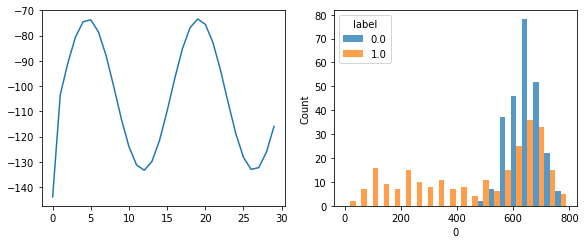

Testing separation for shapelet 1
Accuracy = 0.5
[[  0 200]
 [  0 200]]


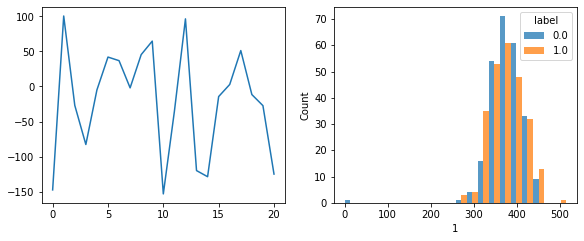

Testing separation for shapelet 2
Accuracy = 0.665
[[158  42]
 [ 92 108]]


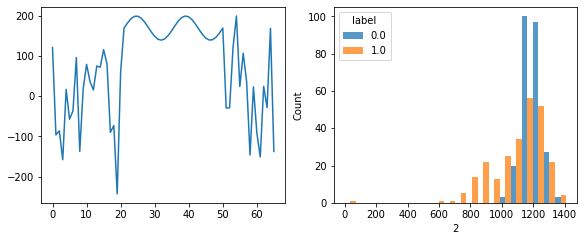

Testing separation for shapelet 3
Accuracy = 0.45
[[ 92 108]
 [112  88]]


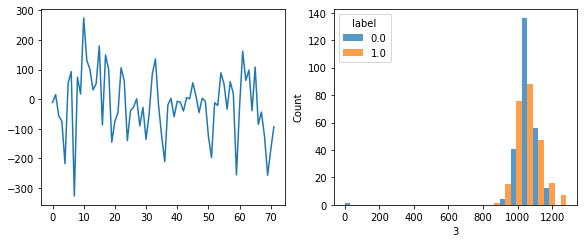

Testing separation for shapelet 4
Accuracy = 0.4475
[[ 92 108]
 [113  87]]


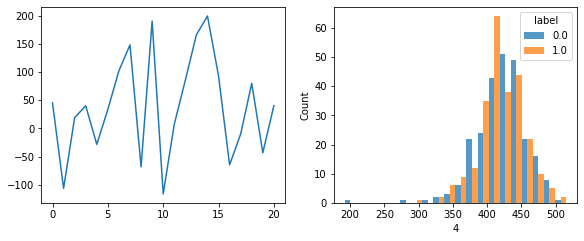

Testing separation for shapelet 5
Accuracy = 0.695
[[176  24]
 [ 98 102]]


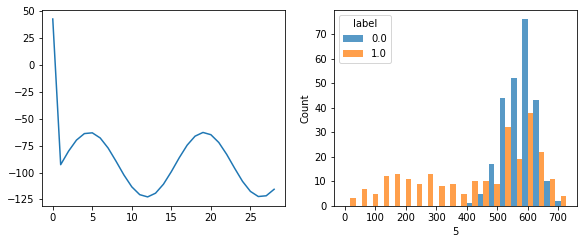

Testing separation for shapelet 6
Accuracy = 0.4875
[[101  99]
 [106  94]]


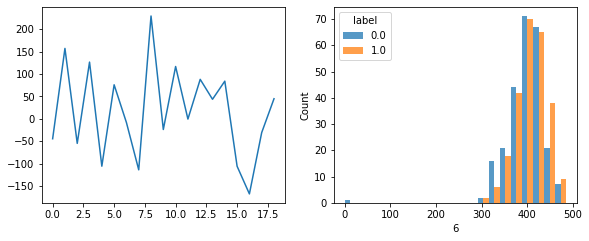

Testing separation for shapelet 7
Accuracy = 0.5175
[[117  83]
 [110  90]]


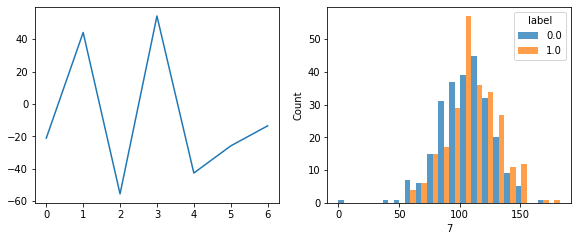

Testing separation for shapelet 8
Accuracy = 0.56
[[101  99]
 [ 77 123]]


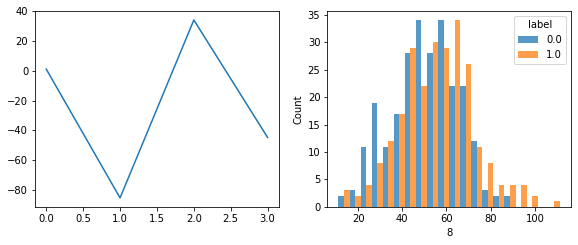

Testing separation for shapelet 9
Accuracy = 0.6075
[[124  76]
 [ 81 119]]


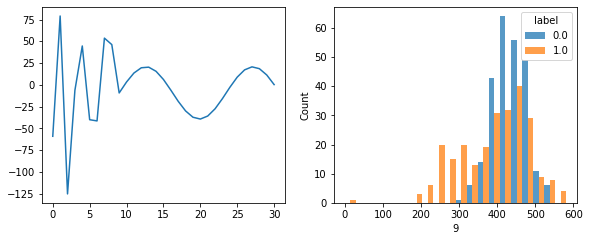

Testing separation for shapelet 10
Accuracy = 0.5825
[[140  60]
 [107  93]]


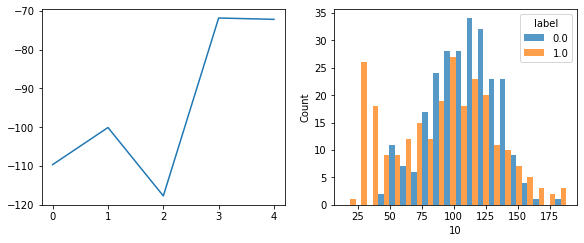

Testing separation for shapelet 11
Accuracy = 0.545
[[107  93]
 [ 89 111]]


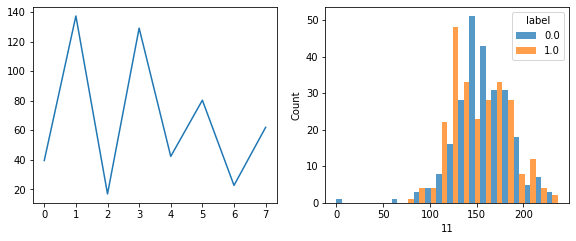

Testing separation for shapelet 12
Accuracy = 0.655
[[159  41]
 [ 97 103]]


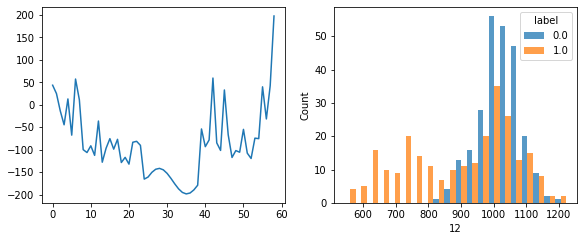

Testing separation for shapelet 13
Accuracy = 0.7
[[169  31]
 [ 89 111]]


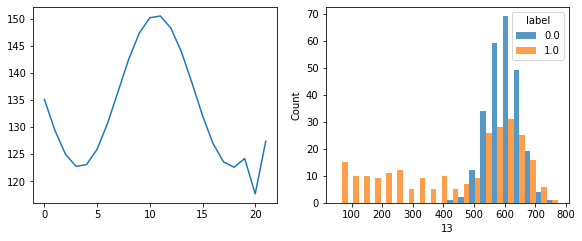

Testing separation for shapelet 14
Accuracy = 0.5575
[[115  85]
 [ 92 108]]


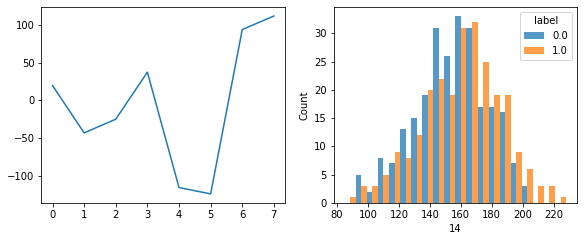

Testing separation for shapelet 15
Accuracy = 0.4625
[[ 82 118]
 [ 97 103]]


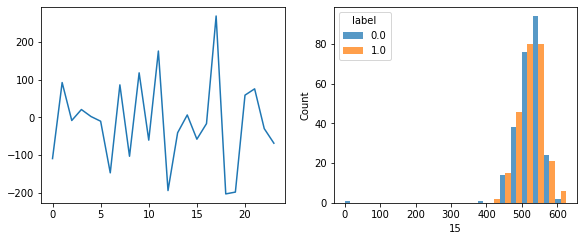

Testing separation for shapelet 16
Accuracy = 0.6175
[[126  74]
 [ 79 121]]


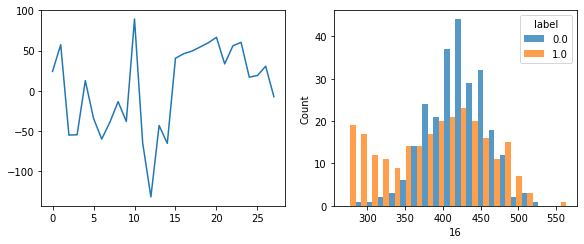

Testing separation for shapelet 17
Accuracy = 0.4825
[[120  80]
 [127  73]]


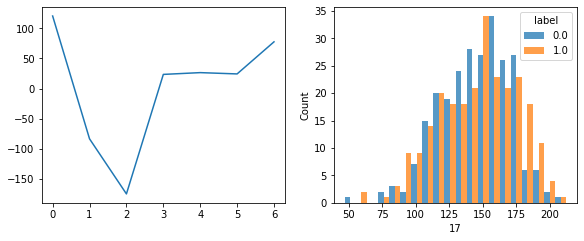

Testing separation for shapelet 18
Accuracy = 0.52
[[ 87 113]
 [ 79 121]]


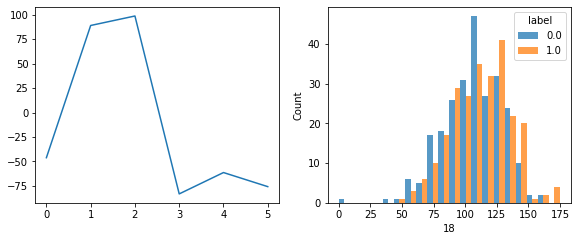

Testing separation for shapelet 19
Accuracy = 0.6425
[[135  65]
 [ 78 122]]


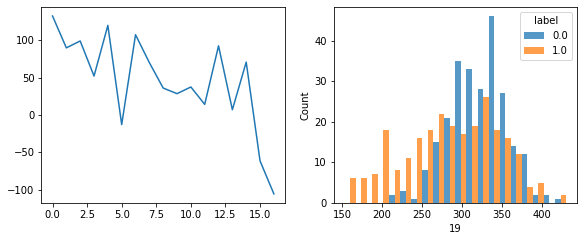

Testing separation for shapelet 20
Accuracy = 0.4625
[[ 87 113]
 [102  98]]


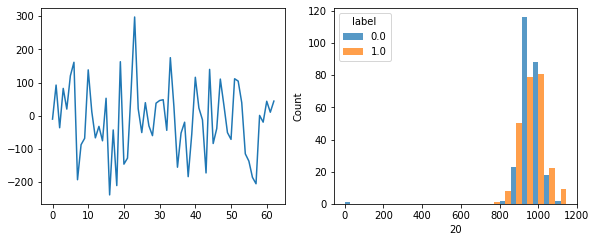

Testing separation for shapelet 21
Accuracy = 0.6275
[[135  65]
 [ 84 116]]


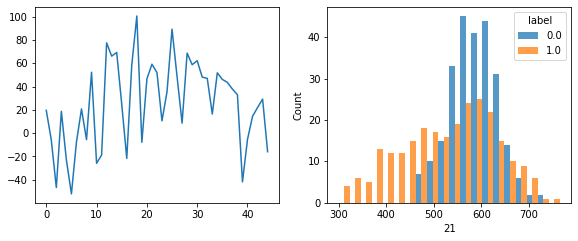

Testing separation for shapelet 22
Accuracy = 0.5625
[[124  76]
 [ 99 101]]


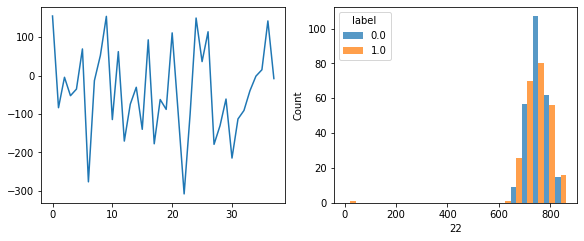

Testing separation for shapelet 23
Accuracy = 0.5025
[[122  78]
 [121  79]]


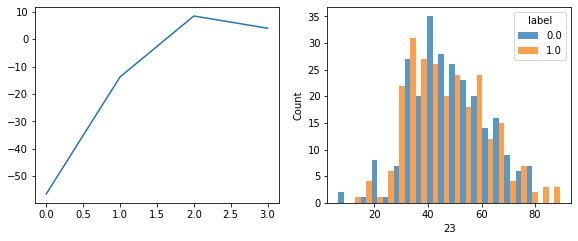

Testing separation for shapelet 24
Accuracy = 0.4875
[[ 97 103]
 [102  98]]


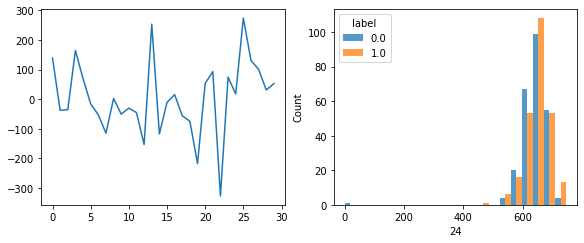

Testing separation for shapelet 25
Accuracy = 0.6
[[127  73]
 [ 87 113]]


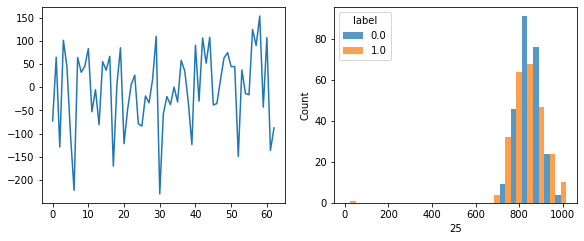

In [16]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_classification_separation(
        D=distances, 
        y=y, 
        d_train=distances_train, 
        d_test=distances_test, 
        shap=shap, 
        shap_id=i,
        plot_sin_y=False
    )

## Manually input sin shapelet

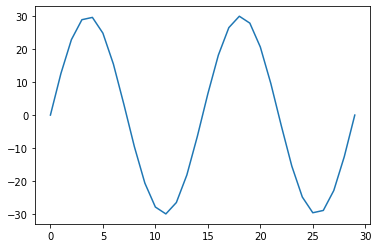

In [18]:
sin_length = 30
t = np.linspace(0, 4*np.pi, sin_length)
sine_wave = 30 * np.sin(t)
plt.plot(sine_wave)

In [22]:
%%time
distances_sin = gendis.transform(X, shapelets=[sine_wave])
dist_sin_train = gendis.transform(X_train, shapelets=[sine_wave])
dist_sin_test = gendis.transform(X_test, shapelets=[sine_wave])

distances_sin['label'] = df['label']

CPU times: user 606 ms, sys: 30 µs, total: 606 ms
Wall time: 605 ms


Testing separation for shapelet 0
Accuracy = 0.66
[[151  49]
 [ 87 113]]


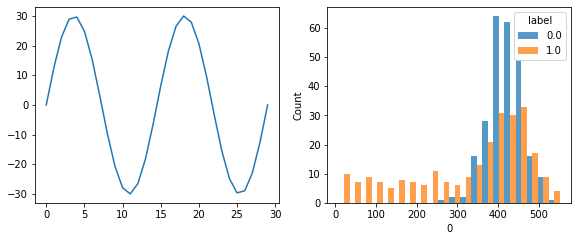

In [25]:
test_classification_separation(
        D=distances_sin, 
        y=y, 
        d_train=dist_sin_train, 
        d_test=dist_sin_test, 
        shap=sine_wave, 
        shap_id=0,
        plot_sin_y=False
    )